# Import necessary libraries and datasets

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Only for datasets
from torchvision import datasets

In [2]:
train_data = datasets.MNIST(
    root="data/MNIST/", 
    train=True, 
    download=True, 
    target_transform=None 
)

test_data = datasets.MNIST(
    root="data/MNIST/",
    train=False, 
    download=True,
    target_transform=None 
)

train_data_fashion = datasets.FashionMNIST(
    root="data/FashionMNIST/",
    train=True,
    download=True,
    target_transform=None
)

test_data_fashion = datasets.FashionMNIST(
    root="data/FashionMNIST/",
    train=False,
    download=True,
    target_transform=None
)
class_names = train_data_fashion.classes

100%|██████████| 9912422/9912422 [00:00<00:00, 26129265.37it/s]


Extracting data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 61303488.78it/s]

Extracting data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45470268.29it/s]


Extracting data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17009400.69it/s]


Extracting data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 17894347.97it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 380705.85it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6628077.22it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11216767.27it/s]

Extracting data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



# Mnist

In [3]:
X_train, X_test = train_data.data.numpy(), test_data.data.numpy()
y_train, y_test = train_data.targets.numpy(), test_data.targets.numpy()

In [4]:
X_train = X_train/255
X_test = X_test/255

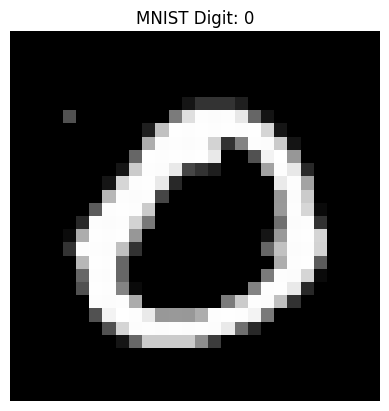

In [5]:
index_no = np.random.randint(1,60000)
image = X_train[index_no]

plt.imshow(image, cmap='gray')
plt.title(f'MNIST Digit: {y_train[index_no]}')
plt.axis(False)
plt.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

![CamScanner 12-23-2023 00.59_1.jpg](<attachment:CamScanner 12-23-2023 00.59_1.jpg>)
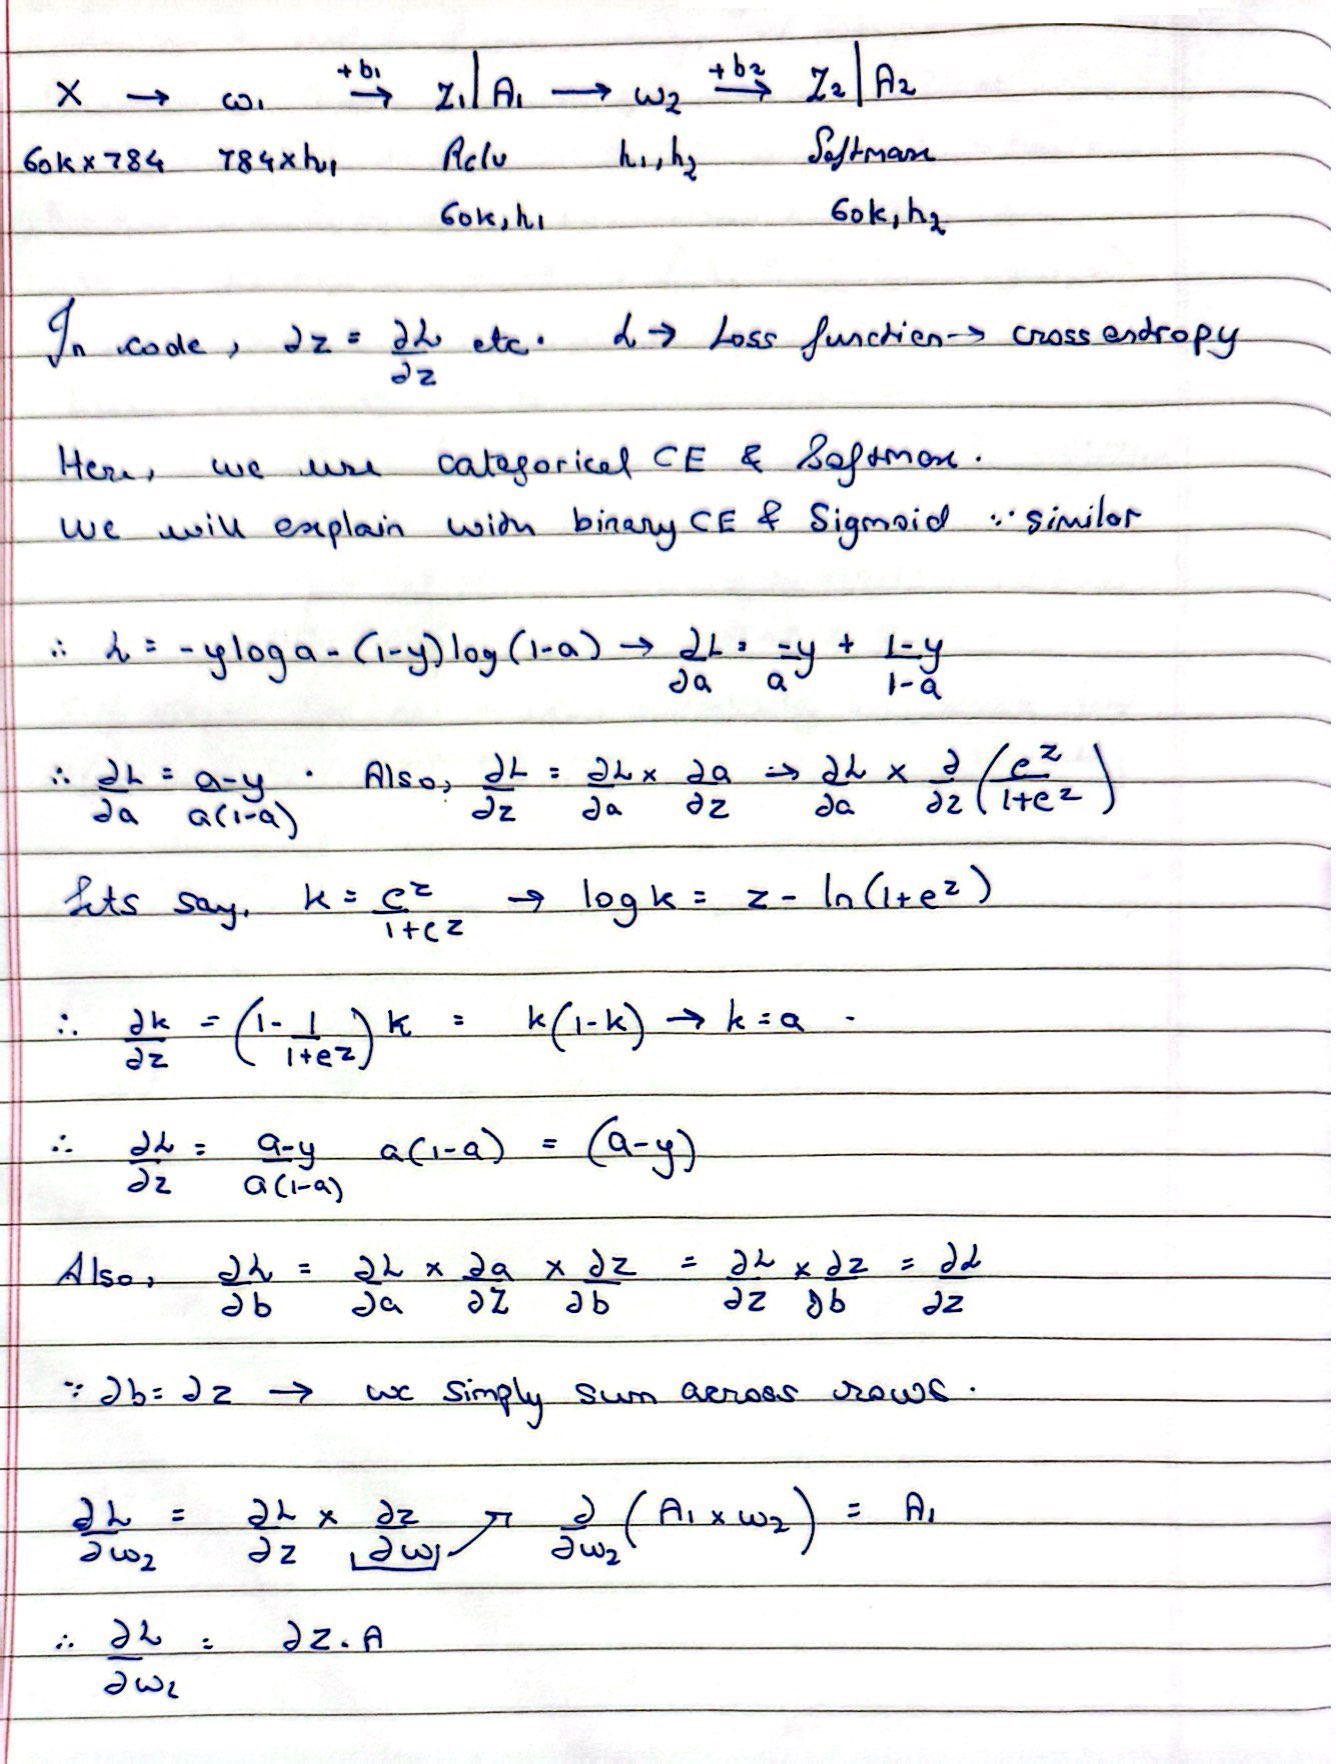

In [7]:
def initial_parameters(h1):
    W1 = np.random.randn(784, h1) / np.sqrt(784)
    b1 = np.zeros((1, h1))
    W2 = np.random.randn(h1, 10) / np.sqrt(h1)
    b2 = np.zeros((1, 10))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def ReLu_derivative(Z):
    return Z > 0

# def softmax(Z):
#     return np.exp(Z)/np.sum(np.exp(Z))

def softmax(z):
    max_z = np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z - max_z)
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)    
    return softmax_probs

def forward_propogation(W1, b1, W2, b2, X):
    Z1 = X.dot(W1) + b1
    A1 = ReLU(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encode(y):
    one_hot_encode_y = np.zeros((y.size, len(np.unique(y))))
    one_hot_encode_y[np.arange(y.size), y] = 1 #fancy indexing
    return one_hot_encode_y

def backward_propogation(Z1, A1, A2, W2, X, y):
    m = y.size
    one_hot_encoded_y = one_hot_encode(y)
    dZ2 = A2 - one_hot_encoded_y
    dW2 = (1/m) * dZ2.T.dot(A1) #h2,h1
    db2 = (1/m) * np.sum(dZ2, 0) # 0 is the axis
    dZ1 = dZ2.dot(W2.T) * ReLu_derivative(Z1)
    dW1 = (1/m) * X.T.dot(dZ1)
    db1 = (1/m) * np.sum(dZ1, 0)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2.T
    b2 = b2 - lr * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 1)

def get_accuracy(predictions, y):
    return np.sum(predictions == y)/len(y)


def gradient_descent(X, y, iterations, lr, h1=10):
    np.random.seed(7)
    lr2 = lr/2
    lr3 = lr/4
    W1, b1, W2, b2 = initial_parameters(h1)
    for i in range(iterations):
        if i > iterations/1.3:
            lr = lr3
        elif i > iterations/2:
            lr = lr2
        Z1, A1, Z2, A2 = forward_propogation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propogation(Z1, A1, A2, W2, X, y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        if (i+1)%100 == 0:
            print(f'Iteration: {i+1}')
            print("Accuracy: ", get_accuracy(get_predictions(A2), y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 1000, 0.2, 40)

Iteration: 100
Accuracy:  0.8903666666666666
Iteration: 200
Accuracy:  0.9079333333333334
Iteration: 300
Accuracy:  0.9174833333333333
Iteration: 400
Accuracy:  0.9241666666666667
Iteration: 500
Accuracy:  0.9295833333333333
Iteration: 600
Accuracy:  0.9317
Iteration: 700
Accuracy:  0.9338333333333333
Iteration: 800
Accuracy:  0.9353666666666667
Iteration: 900
Accuracy:  0.9364666666666667
Iteration: 1000
Accuracy:  0.9374333333333333


In [9]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_and_plot(index, W1, b1, W2, b2):
    current_image = X_train[index, :, None]
    predictions = predict(X_train[index, :, None].T, W1, b1, W2, b2)
    label = y_train[index]

    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, cmap='Greys_r')
    if predictions == label:
        plt.title(f'Actual: {label} | Prediction: {predictions}', c='g')
    else:
        plt.title(f'Actual: {label} | Prediction: {predictions}', c='r')
    plt.axis(False)
    plt.show()

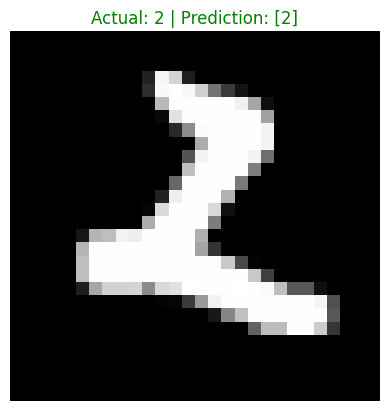

In [10]:
test_and_plot(np.random.randint(0, 60000), W1, b1, W2, b2)

# Fashion Mnist

In [16]:
X_train, X_test = train_data_fashion.data.numpy(), test_data_fashion.data.numpy()
y_train, y_test = train_data_fashion.targets.numpy(), test_data_fashion.targets.numpy()

In [17]:
X_train = X_train/255
X_test = X_test/255

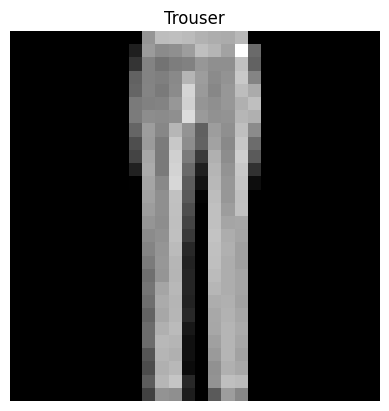

In [18]:
index_no = np.random.randint(1,60000)
image = X_train[index_no]

plt.imshow(image, cmap='Greys_r')
plt.title(f'{class_names[y_train[index_no]]}')
plt.axis(False)
plt.show()

In [19]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 1000, 0.2, 40)

Iteration: 100
Accuracy:  0.7597333333333334
Iteration: 200
Accuracy:  0.8078666666666666
Iteration: 300
Accuracy:  0.8239666666666666
Iteration: 400
Accuracy:  0.8371833333333333
Iteration: 500
Accuracy:  0.8463
Iteration: 600
Accuracy:  0.8561333333333333
Iteration: 700
Accuracy:  0.8584
Iteration: 800
Accuracy:  0.8602833333333333
Iteration: 900
Accuracy:  0.8610333333333333
Iteration: 1000
Accuracy:  0.8620333333333333


In [ ]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_and_plot(index, W1, b1, W2, b2):
    current_image = X_train[index, :, None]
    predictions = predict(X_train[index, :, None].T, W1, b1, W2, b2)
    label = y_train[index]

    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, cmap='Greys_r')
    if class_names[predictions[0]] == class_names[label]:
        plt.title(f'Actual: {class_names[label]} | Prediction: {class_names[predictions[0]]}', c='g')
    else:
        plt.title(f'Actual: {class_names[label]} | Prediction: {class_names[predictions[0]]}', c='r')
    plt.axis(False)
    plt.show()

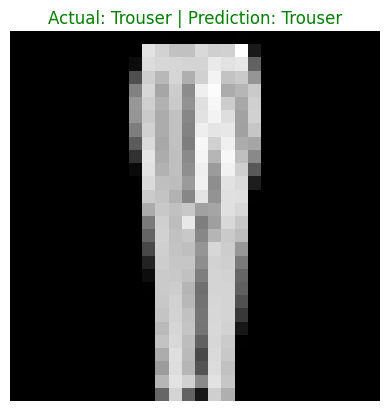

In [ ]:
test_and_plot(np.random.randint(0, 60000), W1, b1, W2, b2)